<h1> 1. Importing our essential libraries </h1>

In [3]:
# Importing our essential libraries (our superhero squad for data analysis!)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Magic trick: Show plots right inside the notebook!
%matplotlib inline

# Setting a stylish theme—because even data likes to look good!
sns.set(style="whitegrid")

<h1>2. Loading the Data </h1>

In [4]:
df = pd.read_csv('sleep_cycle_productivity.csv')
df.head()

,Date,Person_ID,Age,Gender,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level
0,2024-04-12,1860,32,Other,23.33,4.61,5.28,3,86,87,116,8.808920,8,3,6
1,2024-11-04,1769,41,Female,21.02,2.43,5.41,5,32,21,88,6.329833,10,3,7
2,2024-08-31,2528,20,Male,22.10,3.45,5.35,7,17,88,59,8.506306,10,9,10
3,2024-02-22,8041,37,Other,23.10,6.65,7.55,8,46,34,80,6.070240,8,4,2
4,2024-02-23,4843,46,Other,21.42,4.17,6.75,10,61,269,94,11.374994,8,7,9


<h1>3. Getting to Know Our Data </h1>

In [5]:
# Let’s see what makes our dataset tick!
print("Dataset Information:")
df.info()

print("\nSummary Statistics:")
df.describe()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           5000 non-null   object 
 1   Person_ID                      5000 non-null   int64  
 2   Age                            5000 non-null   int64  
 3   Gender                         5000 non-null   object 
 4   Sleep Start Time               5000 non-null   float64
 5   Sleep End Time                 5000 non-null   float64
 6   Total Sleep Hours              5000 non-null   float64
 7   Sleep Quality                  5000 non-null   int64  
 8   Exercise (mins/day)            5000 non-null   int64  
 9   Caffeine Intake (mg)           5000 non-null   int64  
 10  Screen Time Before Bed (mins)  5000 non-null   int64  
 11  Work Hours (hrs/day)           5000 non-null   float64
 12  Productivity Score         

,Person_ID,Age,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,5527.152200,38.590600,22.005350,4.980262,6.974902,5.520800,43.962600,146.71140,91.421200,7.987873,5.644200,5.370600,5.548000
std,2595.391771,12.302799,1.157591,1.862508,1.454033,2.863845,25.798541,85.83139,52.079123,2.275734,2.872221,2.835783,2.888419
min,1000.000000,18.000000,20.000000,0.560000,4.500000,1.000000,0.000000,0.00000,0.000000,4.000067,1.000000,1.000000,1.000000
25%,3258.000000,28.000000,21.020000,3.660000,5.690000,3.000000,22.000000,73.00000,46.000000,6.032720,3.000000,3.000000,3.000000
50%,5603.000000,39.000000,22.020000,4.970000,6.960000,5.000000,44.000000,144.00000,92.000000,7.998295,6.000000,5.000000,6.000000
75%,7749.500000,49.000000,23.000000,6.310000,8.210000,8.000000,66.000000,220.00000,136.000000,9.905024,8.000000,8.000000,8.000000
max,9998.000000,59.000000,23.980000,9.420000,9.500000,10.000000,89.000000,299.00000,179.000000,11.999141,10.000000,10.000000,10.000000


<h1>  4. Data Cleaning</h1>

In [6]:
# Checking for any lazy, missing values in our dataset
print("Missing values per column:")
print(df.isnull().sum())

# Removing any duplicates (no twin data allowed!)
df.drop_duplicates(inplace=True)

Missing values per column:
Date                             0
Person_ID                        0
Age                              0
Gender                           0
Sleep Start Time                 0
Sleep End Time                   0
Total Sleep Hours                0
Sleep Quality                    0
Exercise (mins/day)              0
Caffeine Intake (mg)             0
Screen Time Before Bed (mins)    0
Work Hours (hrs/day)             0
Productivity Score               0
Mood Score                       0
Stress Level                     0
dtype: int64


<h1>5. Converting Data Types </h1>
<h4>We need to convert our date and time strings into real datetime objects. This lets us work with time like a pro—even if you're not a time traveler! </h4>
<h2>5.1 Inspect the Time Columns</h2>
<h4>First, check a few values from the time columns to see their format:</h4>


In [7]:
# Peek at the sleep time columns
print(df['Sleep Start Time'].head())
print(df['Sleep End Time'].head())

0    23.33
1    21.02
2    22.10
3    23.10
4    21.42
Name: Sleep Start Time, dtype: float64
0    4.61
1    2.43
2    3.45
3    6.65
4    4.17
Name: Sleep End Time, dtype: float64


<h2>5.2 Clean the Time Columns </h2>
<h4>We'll update the time columns so that if an entry does not contain a colon (:), we assume it’s only the hour and add ":00" to it. We’ll also convert these values to strings (in case they’re numbers).</h4>

In [8]:
# Convert to string and add ":00" if missing a colon.
def clean_time(time_value):
    time_str = str(time_value).strip()
    # If there's no colon, assume it's only an hour value and add ":00"
    if ':' not in time_str:
        try:
            # Convert to integer to remove any decimals and then format as 2-digit hour.
            hour = int(float(time_str))
            time_str = f"{hour:02d}:00"
        except ValueError:
            # If conversion fails, return the original string
            pass
    return time_str

df['Sleep Start Time'] = df['Sleep Start Time'].apply(clean_time)
df['Sleep End Time'] = df['Sleep End Time'].apply(clean_time)

# Check the cleaned values
print(df['Sleep Start Time'].head())
print(df['Sleep End Time'].head())

0    23:00
1    21:00
2    22:00
3    23:00
4    21:00
Name: Sleep Start Time, dtype: object
0    04:00
1    02:00
2    03:00
3    06:00
4    04:00
Name: Sleep End Time, dtype: object


<h4>This function checks if a colon is present. If not, it assumes the value is just an hour and converts it to a string like "07:00"</h4>

<h2>5.3. Convert the 'Date' Column and Create Datetime Columns</h2>
<h4>Now, convert the Date column to datetime and then combine it with our cleaned time columns to create full datetime objects for Sleep Start and Sleep End.</h4>

In [9]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Combine date with the cleaned sleep times.
df['Sleep Start'] = pd.to_datetime(df['Date'].dt.strftime('%Y-%m-%d') + ' ' + df['Sleep Start Time'])
df['Sleep End'] = pd.to_datetime(df['Date'].dt.strftime('%Y-%m-%d') + ' ' + df['Sleep End Time'])

# If sleep ends before sleep starts (i.e., past midnight), add one day to Sleep End.
mask = df['Sleep End'] < df['Sleep Start']
df.loc[mask, 'Sleep End'] = df.loc[mask, 'Sleep End'] + pd.Timedelta(days=1)

# Verify our new datetime columns
df[['Date', 'Sleep Start Time', 'Sleep Start', 'Sleep End Time', 'Sleep End']].head()

,Date,Sleep Start Time,Sleep Start,Sleep End Time,Sleep End
0,2024-04-12,23:00,2024-04-12 23:00:00,04:00,2024-04-13 04:00:00
1,2024-11-04,21:00,2024-11-04 21:00:00,02:00,2024-11-05 02:00:00
2,2024-08-31,22:00,2024-08-31 22:00:00,03:00,2024-09-01 03:00:00
3,2024-02-22,23:00,2024-02-22 23:00:00,06:00,2024-02-23 06:00:00
4,2024-02-23,21:00,2024-02-23 21:00:00,04:00,2024-02-24 04:00:00


<h4> With these transformations, our data is now ready to reveal its secrets about bedtime and wake-up shenanigans.</h4>

<h2>5.4. Clean and Check the Age Column</h2>
<h4>If you want to ensure the Age column is properly formatted (e.g., as integers), you can convert it as well:</h4>

In [10]:
# Convert the Age column to integer if necessary.
df['Age'] = df['Age'].astype(int)

<h1>6. Exploratory Data Analysis (Let’s Explore & Have Fun!)</h1>
<h2>6.1 Distribution of Total Sleep Hours and Sleep Quality</h2>
<h4>Let’s see how our sleep hours and quality are distributed. You might just discover whether you're a night owl or an early bird!</h4>

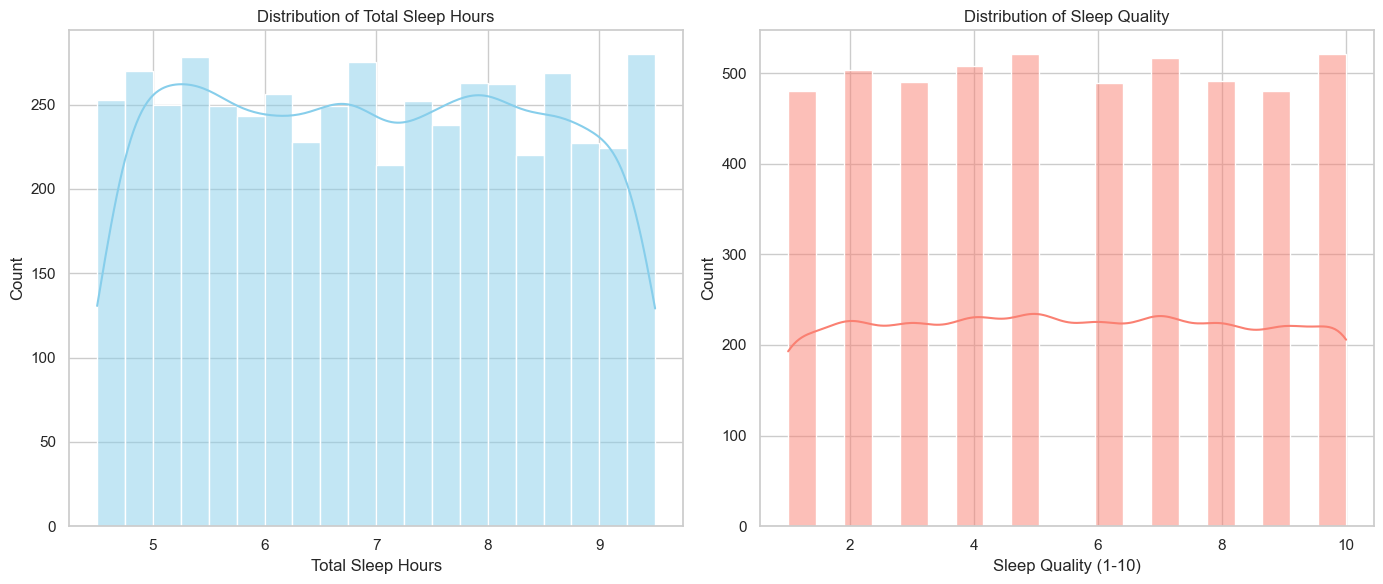

In [11]:
plt.figure(figsize=(14,6))

# Histogram for Total Sleep Hours
plt.subplot(1,2,1)
sns.histplot(df['Total Sleep Hours'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Total Sleep Hours')
plt.xlabel('Total Sleep Hours')

# Histogram for Sleep Quality
plt.subplot(1,2,2)
sns.histplot(df['Sleep Quality'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Sleep Quality')
plt.xlabel('Sleep Quality (1-10)')
plt.tight_layout()
plt.show()

<h4>These plots help us understand if most of us are sleeping like babies or just catching a few Z’s.</h4>

<h2>6.2 Sleep Quality vs. Age </h2>
<h4>Ever wondered if age affects your sleep quality? Let’s scatter some points and find out—with a touch of humor, of course!</h4>

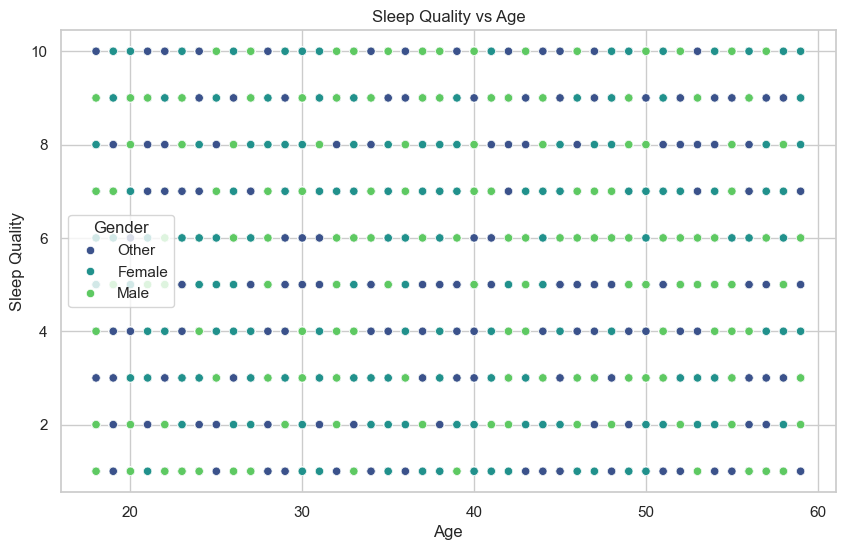

In [12]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Age', y='Sleep Quality', hue='Gender', palette='viridis')
plt.title('Sleep Quality vs Age')
plt.xlabel('Age')
plt.ylabel('Sleep Quality')
plt.show()

<h4> This plot might reveal if older folks really are wiser—or just more tired!</h4>

<h2>6.3 Sleep Quality by Gender (Battle of the Sexes… in Sleep!)</h2>
<h4>Time for some boxplot fun—comparing sleep quality across genders. Who will win the “Best Sleep” award?</h4>

<h2>6.4 Correlation Analysis (Finding Data’s Best Friends)</h2>
<h4>Let’s see which variables are best pals. Are exercise and sleep quality BFFs? Does caffeine have a love-hate relationship with sleep?</h4>

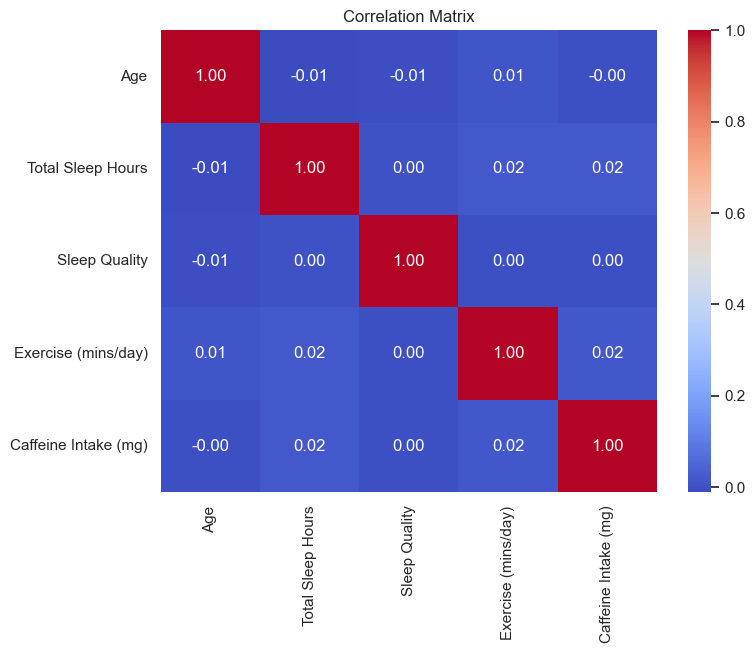

In [13]:
# Selecting the numbers game: Age, Total Sleep Hours, Sleep Quality, Exercise, and Caffeine Intake
num_cols = ['Age', 'Total Sleep Hours', 'Sleep Quality', 'Exercise (mins/day)', 'Caffeine Intake (mg)']
corr_matrix = df[num_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

<h4>This heatmap is like a friendship chart—warm colors might hint at a passionate (or problematic) relationship!</h4>

<h2>6.5 Exercise & Caffeine vs. Sleep Quality (The Energy Equation)</h2>
<h4>Let’s plot some scatter plots to explore how exercise and caffeine intake might be dancing with sleep quality.</h4>

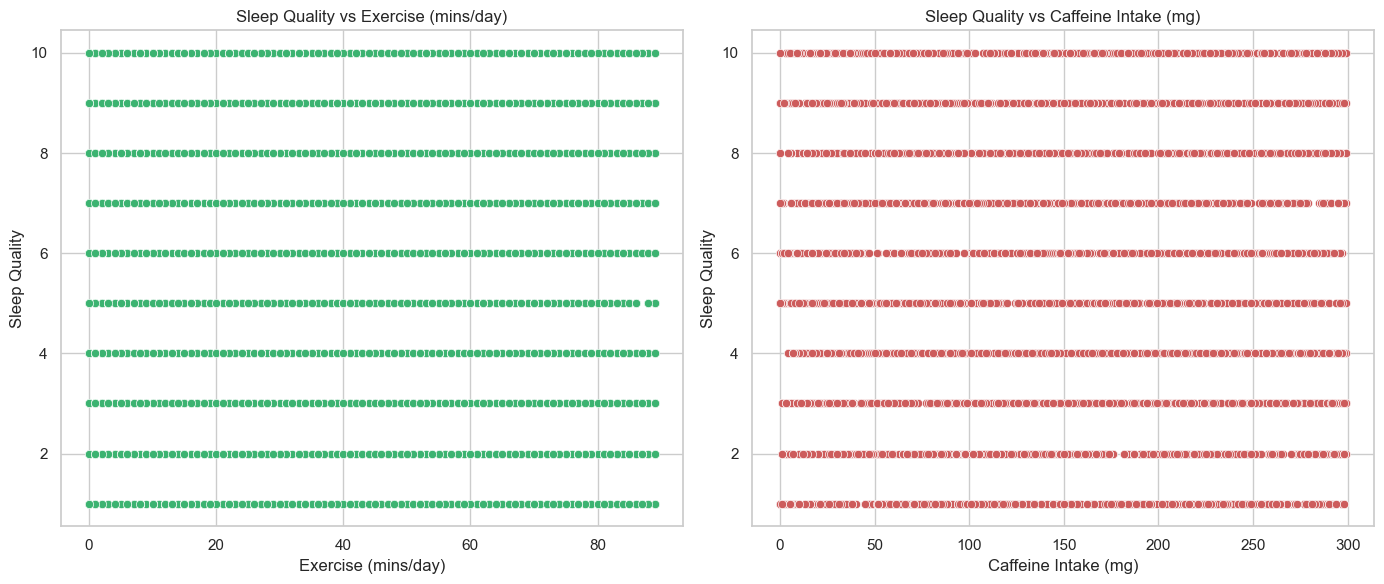

In [14]:
plt.figure(figsize=(14,6))

# Exercise vs. Sleep Quality
plt.subplot(1,2,1)
sns.scatterplot(data=df, x='Exercise (mins/day)', y='Sleep Quality', color='mediumseagreen')
plt.title('Sleep Quality vs Exercise (mins/day)')
plt.xlabel('Exercise (mins/day)')

# Caffeine Intake vs. Sleep Quality
plt.subplot(1,2,2)
sns.scatterplot(data=df, x='Caffeine Intake (mg)', y='Sleep Quality', color='indianred')
plt.title('Sleep Quality vs Caffeine Intake (mg)')
plt.xlabel('Caffeine Intake (mg)')

plt.tight_layout()
plt.show()

<h2>6.6 Sleep Start and End Times (When Do We Hit the Hay?)</h2>
<h4>Ever wonder what time most people crash? Let’s plot the hours when the party (i.e., sleep) starts and when it ends.</h4>

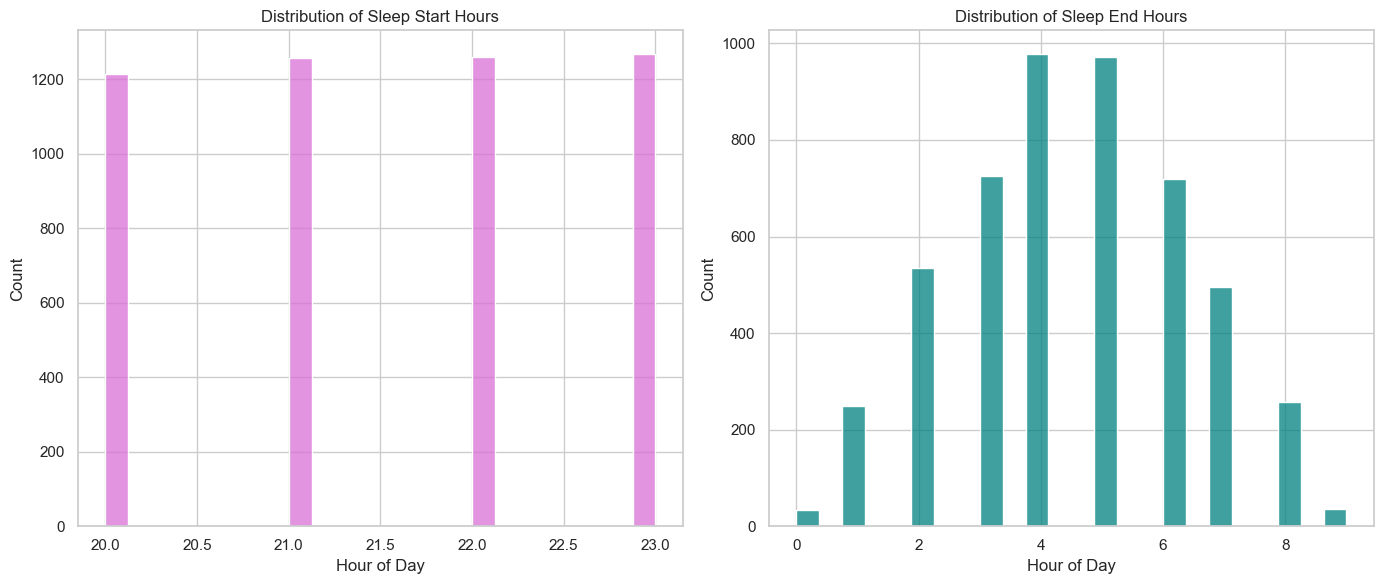

In [15]:
plt.figure(figsize=(14,6))

# Distribution of Sleep Start Hours
plt.subplot(1,2,1)
sns.histplot(df['Sleep Start'].dt.hour, bins=24, color='orchid', kde=False)
plt.title('Distribution of Sleep Start Hours')
plt.xlabel('Hour of Day')

# Distribution of Sleep End Hours
plt.subplot(1,2,2)
sns.histplot(df['Sleep End'].dt.hour, bins=24, color='teal', kde=False)
plt.title('Distribution of Sleep End Hours')
plt.xlabel('Hour of Day')

plt.tight_layout()
plt.show()

<h4>These plots are like a time-lapse of our nightly routines—find out if you’re a midnight owl or an early riser!</h4>

<h1>7. Diving Deeper: Day-of-Week Analysis</h1>
<h4>Let's add some spice by checking if sleep quality varies by the day of the week. Do weekends bring better sleep, or is it just an excuse for extra pillow time?</h4>

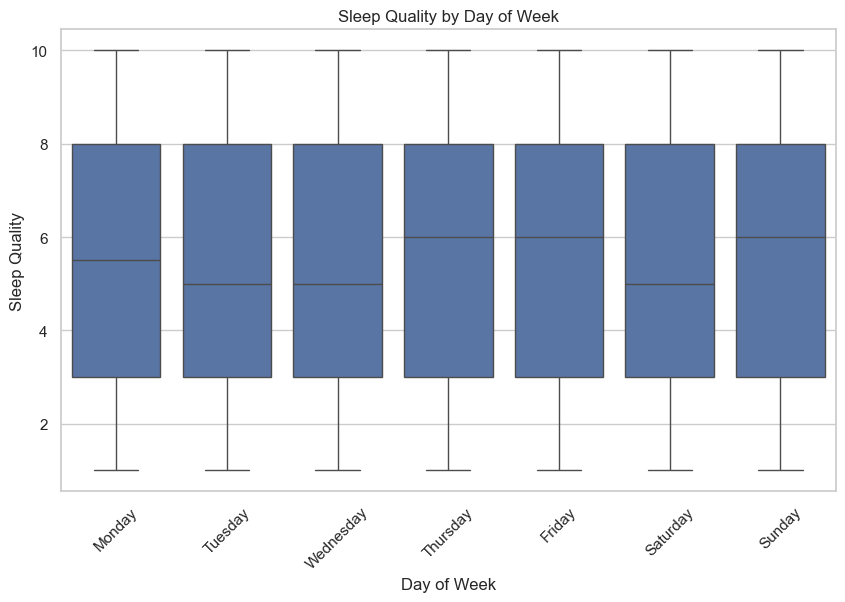

In [16]:
# Extract day of the week from the Date
df['DayOfWeek'] = df['Date'].dt.day_name()

plt.figure(figsize=(10,6))
sns.boxplot(x='DayOfWeek', y='Sleep Quality', data=df, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Sleep Quality by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Sleep Quality')
plt.xticks(rotation=45)
plt.show()

<h1>8. Wrapping Up Our Sleepy Saga</h1>
<h4>This notebook performed a comprehensive EDA on the Sleep Cycle & Productivity dataset.<br>
Key observations include:<br>
- Distributions of sleep hours and quality—revealing potential outliers (and maybe a few insomniacs).<br>
- Interesting trends in sleep quality across different age groups and genders.<br>
- Revealed relationships between exercise, caffeine intake, and sleep quality.<br>
- Mapped common sleep and wake times along with possible day-of-week effects.</h4>